# Chapter 03 3차원 세계로의 도약

## 3.1 3차원 공간에서 벡터 그리기

In [1]:
%load_ext autoreload
%autoreload 2
from draw3d import *

### 3.1.2 파이썬으로 3차원 그림 그리기

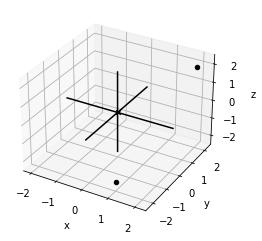

In [3]:
draw3d(
    Points3D((2,2,2), (1,-2,-2))
)

C:\Users\lhk65\OneDrive\Desktop\Project\Math-for-Programmers\Part 1\Chapter 03\draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


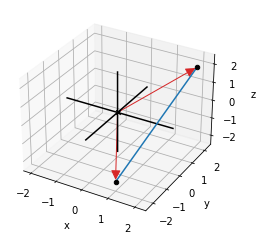

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2),(1,-2,-2))
)

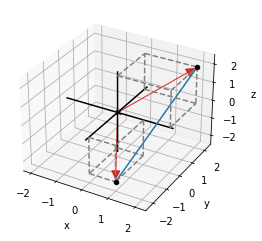

In [8]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

### 3.1.3 연습문제

### 연습문제 3.1
#### 좌표 (-1,2,2)를 나타내는 3차원 화살표와 점을 그리고, 화살표를 3차원처럼 보이게 하는 점선 박스도 그려라. 이 그림은 연습 차원에서 손으로 그려보아야 한다. 향후 3차원 그림은 파이썬으로 그릴 것이다.

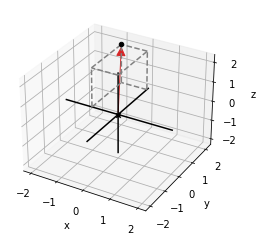

In [11]:
draw3d(
    Points3D((-1,2,2)),
    Arrow3D((-1,2,2)),
    Box3D(-1,2,2)
)

### 연습문제 3.2 (Mini-project)
#### 각 좌표가 +1 또는 -1인 3차원 벡터는 총 8가지가 있다. 한 가지 예는 (1,-1,1)이다. 8개의 벡터를 점으로 프로팅하라. 그런 다음 Segment3D 객체를 사용해 정육면체의 외곽선을 형성하도록 점들을 선분으로 연결할 방법을 생각해보자.

In [13]:
pm1 = [1,-1]

In [14]:
verticles = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]

In [15]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
            [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
            [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]

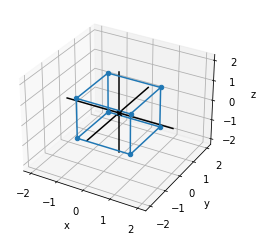

In [17]:
draw3d(
    Points3D(*verticles, color=blue),
    *[Segment3D(*edge) for edge in edges]
)

## 3.2 3차원에서의 벡터 산술

### 3.2.1 3차원 벡터 더하기

In [18]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    corrdinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [30]:
list(zip(*[(1,1,3),(2,4,-4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [31]:
[sum(coords) for coords in [(1,2,4), (1,4,2), (3,-4,-2)]]

[7, 7, -3]

In [32]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [33]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [34]:
length((3,4,12))

13.0

### 3.2.6 연습문제

### 연습문제 3.3
#### 두 벡터 (4,0,3)과 (-1,0,1)을 Arrow3D 객체로 그리되, 두 벡터를 3차원 상에서 삼각형법으로 가능한 두 가지 순서대로 배치해 그려라. 그리고 벡터합을 구하라.

In [35]:
add((4,0,3),(-1,0,1))

(3, 0, 4)

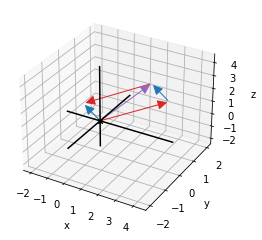

In [37]:
draw3d(
    Arrow3D((4,0,3), color=red),
    Arrow3D((-1,0,1), color=blue),
    Arrow3D((3,0,4),(4,0,3), color=blue),
    Arrow3D((-1,0,1),(3,0,4), color=red),
    Arrow3D((3,0,4), color=purple)
)

### 연습문제 3.4
#### vectors1=[(1,2,3,4,5),(6,7,8,9,10)]과 vectors2=[(1,2),(3,4),(5,6)]이라고 설정했다고 하자. 파이썬에서 계산하지 않고 zip(\*vectors1)과 zip(\*vectors2)의 결과로 얻는 튜플의 개수를 각각 구하라.

In [43]:
vectors1=[(1,2,3,4,5), (6,7,8,9,10)]

In [44]:
vectors2=[(1,2), (3,4), (5,6)]

In [45]:
len(list(zip(*vectors1)))

5

In [47]:
len(list(zip(*vectors2)))

2

### 연습문제 3.5 (Mini-project)
#### 다음 리스트 컴프리헨션은 24개의 파이썬 벡터로 이루어진 리스트를 만든다.
<pre>
<code>
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
</code>
</pre>
#### 이 24개 벡터의 합을 구하라. Arrow3D 객체로 삼각형법을 사용해 24개 벡터 모두를 그려라.

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


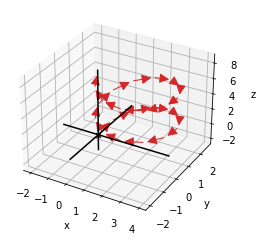

In [48]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

running_sum = (0,0,0) #<1>
arrows = []
for v in vs:
    next_sum = add(running_sum, v) #2
    arrows.append(Arrow3D(next_sum, running_sum)) 
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

### 연습문제 3.6
#### 입력으로 주어진 스칼라값과 벡터를 곱해서 리턴하는 함수 scale(scalar,vector)를 작성하라. 특히, 2차원이든 3차원이든 좌표가 몇 개든 상관없이 동작하도록 작성하라.

In [49]:
def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

### 연습문제 3.7
#### $u$ = (1,-1,-1)과 $v$ = (0,0,2)라고 할 때, $u + \frac{1}{2} \cdot (v-u)$를 구하라.

TypeError: unsupported operand type(s) for -: 'list' and 'list'